# Scott Breitbach
## 12-April-2021
## DSC550, Week 5

# 5.2 Exercise: Graph Analysis

## Case Study:  Testing  Hypothesis
#### Hypothesis:  Articles about Climate Change are more likely to be published by "Liberal" sources

##### Load libraries

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter

### Step 1:  Load data into a dataframe

In [2]:
addr1 = "week-5/articles1.csv"
# articles = pd.read_csv(addr1)
articles = pd.read_csv(addr1, index_col=0)

### Step 2:  Check the dimension of the table/look at the data

In [3]:
print(f"The dimension of the table is {articles.shape[0]} rows x {articles.shape[1]} columns.")

The dimension of the table is 50000 rows x 9 columns.


##### Display the data

In [4]:
articles.head(5)

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


##### What type of variables are in the table 

In [5]:
print("Describe Data:")
articles.describe()

Describe Data:


,id,year,month,url
count,50000.000000,50000.000000,50000.000000,0.0
mean,44432.454800,2016.273700,5.508940,NaN
std,15773.615179,0.634694,3.333062,NaN
min,17283.000000,2011.000000,1.000000,NaN
25%,31236.750000,2016.000000,3.000000,NaN
50%,43757.500000,2016.000000,5.000000,NaN
75%,57479.250000,2017.000000,8.000000,NaN
max,73469.000000,2017.000000,12.000000,NaN


In [6]:
print("Summarized Data:")
articles.describe(include=['O'])

Summarized Data:


,title,publication,author,date,content
count,50000,50000,43694,50000,50000
unique,49920,5,3603,983,49888
top,The 10 most important things in the world righ...,Breitbart,Breitbart News,2016-08-22,advertisement
freq,7,23781,1559,221,42


##### Display length of data

In [7]:
print(len(articles))

50000


##### Display publishers (publications)

In [8]:
print(articles.publication.unique())

['New York Times' 'Breitbart' 'CNN' 'Business Insider' 'Atlantic']


##### Display min, max of years published

In [9]:
print(f"Earliest publication year: {int(articles['year'].min())}")
print(f"Latest publication year: {int(articles['year'].max())}")

Earliest publication year: 2011
Latest publication year: 2017


##### Display how many articles from each year

In [10]:
print(articles['year'].value_counts())

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64


### Step 3:  Create some bar charts to show articles

##### Display bar chart of articles sorted by Publication Name

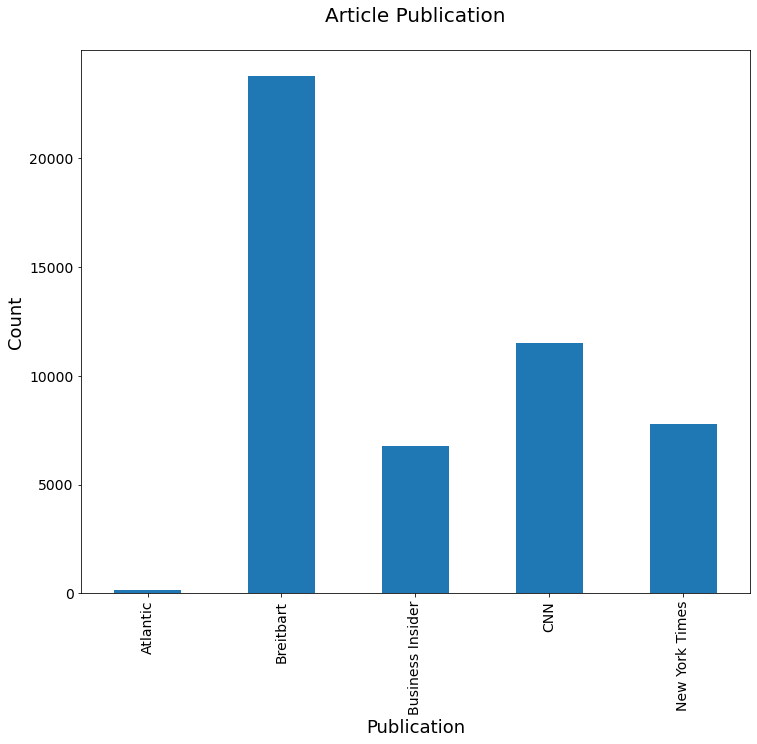

In [11]:
ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Publication\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

##### Display bar chart of articles sorted by counts

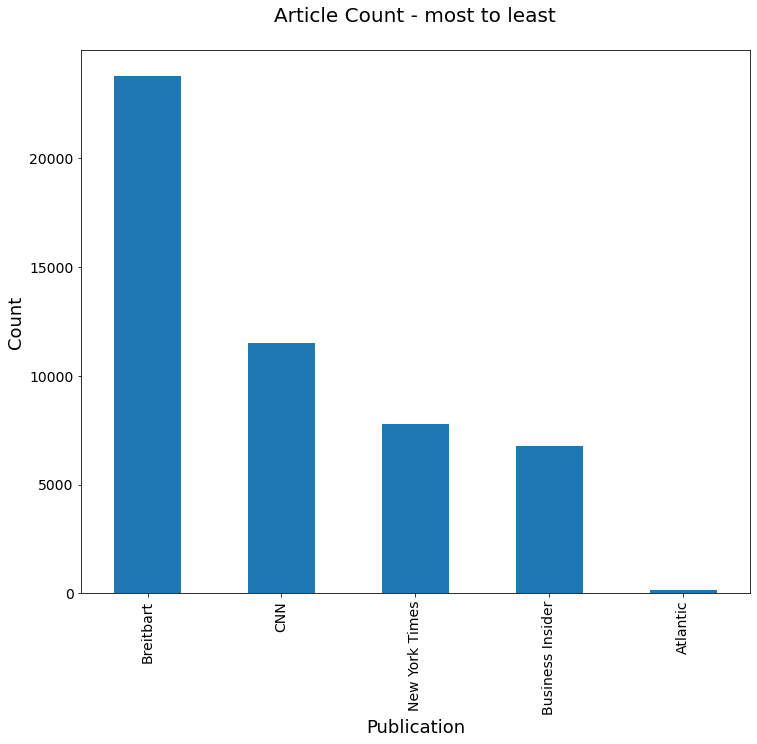

In [12]:
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

### Step 4:  Clean text:  no punctuation/all lowercase

In [13]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [ ]:
articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
print("clean text:\n")
articles['tokenized'].head()

##### Look at mean, min, max article lengths

In [ ]:
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))
print("Mean: ", round(articles['num_wds'].mean(), 2))
print("Min:  ", articles['num_wds'].min())
print("Max:  ", articles['num_wds'].max())

### Step 5:  Remove articles with no words

In [ ]:
len(articles[articles['num_wds']==0])
articles = articles[articles['num_wds']>0]
print("New mean: ", round(articles['num_wds'].mean(), 2))
print("New min:  ", articles['num_wds'].min())

### Step 6:  Check for Outliers:  show bar graph of outliers

In [ ]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);
plt.show()